# FinTech B2B Invoice Management 

# Data Cleaning and preprocessing
### Importing libraries and the dataset

In [2]:
import pandas as pd
import os
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
df = pd.read_csv(r'/Users/rohithkota/Desktop/python project/account_receivable.csv',encoding="latin")

In [3]:
#This below command is to see all the columns in the given dataset.
pd.set_option('display.max_columns',256)

In [4]:
#Top 5 values of the dataset
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT in,20-12-2019 00:00,2019,1930185331,24-11-2019,20191122,20191124,20191229,USD,RV,1,NaN,29400.00,20191124,NAG2,1.930185e+09,0
1,U001,200769623,WAL-MAR foundation,18-11-2019 00:00,2019,1930101259,5/11/2019,20191105,20191105,20191120,USD,RV,1,NaN,471.56,20191105,NAH4,1.930101e+09,0
2,U001,200705742,DOT in,23-01-2020 00:00,2020,1930352605,3/1/2020,20200103,20200103,20200204,USD,RV,1,NaN,28298.92,20200103,NA32,1.930353e+09,0
3,CA02,140104409,LOB us,NaN,2020,2960628001,9/4/2020,20200409,20200409,20200419,CAD,RV,1,NaN,48979.93,20200409,CA10,2.960628e+09,1
4,U001,200780383,MEIJ llc,6/12/2019 0:00,2019,1930167485,19-11-2019,20191119,20191119,20191204,USD,RV,1,NaN,49900.34,20191119,NAA8,1.930167e+09,0


### Dealing with null values

In [5]:
# First we are finding the null values in the data set 
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    9
isOpen                        0
dtype: int64

We can see that there are three columns with null values **"clear_date", "area_business" and "invoice_id"**. We can see that area_business column has only null values so it would be better to delete the entire column.

In [6]:
df.drop(['area_business'],axis=1, inplace = True)

In [7]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    9
isOpen                        0
dtype: int64

We can see that the **"area_business"** column is now completely deleted. Now we will handle the null values in **"invoice_id"** column. As the null values in invoice id are very few and imputing invoice id would not be a smart idea as every invoice id is unique so it is better to delete the data entries where we have null values in **"invoice_id"**.

In [8]:
df = df[df['invoice_id'].notna()]

In [9]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

We can see that the null values in the **"invoice_id"** column are handled.

We will not be imputing the missing values of **"clear_date"** column as it is our target variable and we need to predict those missing values.

### Formatting dates in the given dataset into a proper order

In [10]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year               int64
doc_id                      int64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
posting_id                  int64
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

We can see that **"document_create_date", "document_create_date.1", "due_in_date" and "baseline_create_date"** are integers and if we observe the dataset we can see that the dates are yyyymmdd form but as an 8 digit integer value. So now we will now properly format them into dates.

In [11]:
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

In [12]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT in,20-12-2019 00:00,2019,1930185331,24-11-2019,2019-11-22,2019-11-24,2019-12-29,USD,RV,1,29400.00,2019-11-24,NAG2,1.930185e+09,0
1,U001,200769623,WAL-MAR foundation,18-11-2019 00:00,2019,1930101259,5/11/2019,2019-11-05,2019-11-05,2019-11-20,USD,RV,1,471.56,2019-11-05,NAH4,1.930101e+09,0
2,U001,200705742,DOT in,23-01-2020 00:00,2020,1930352605,3/1/2020,2020-01-03,2020-01-03,2020-02-04,USD,RV,1,28298.92,2020-01-03,NA32,1.930353e+09,0
3,CA02,140104409,LOB us,NaN,2020,2960628001,9/4/2020,2020-04-09,2020-04-09,2020-04-19,CAD,RV,1,48979.93,2020-04-09,CA10,2.960628e+09,1
4,U001,200780383,MEIJ llc,6/12/2019 0:00,2019,1930167485,19-11-2019,2019-11-19,2019-11-19,2019-12-04,USD,RV,1,49900.34,2019-11-19,NAA8,1.930167e+09,0


We can see that the columns **"document_create_date", "document_create_date.1", "due_in_date" and "baseline_create_date"** are now properly formatted into yyyy-mm-dd

If we look at the data now we can see that **"clear_date"** has dates with time 00:00:00 as well but this is redundant as this values is constant for every value in the column. So we will be normalizing this column.

In [13]:
df['clear_date'] = pd.to_datetime(df['clear_date']).dt.normalize()
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT in,2019-12-20,2019,1930185331,24-11-2019,2019-11-22,2019-11-24,2019-12-29,USD,RV,1,29400.00,2019-11-24,NAG2,1.930185e+09,0
1,U001,200769623,WAL-MAR foundation,2019-11-18,2019,1930101259,5/11/2019,2019-11-05,2019-11-05,2019-11-20,USD,RV,1,471.56,2019-11-05,NAH4,1.930101e+09,0
2,U001,200705742,DOT in,2020-01-23,2020,1930352605,3/1/2020,2020-01-03,2020-01-03,2020-02-04,USD,RV,1,28298.92,2020-01-03,NA32,1.930353e+09,0
3,CA02,140104409,LOB us,NaT,2020,2960628001,9/4/2020,2020-04-09,2020-04-09,2020-04-19,CAD,RV,1,48979.93,2020-04-09,CA10,2.960628e+09,1
4,U001,200780383,MEIJ llc,2019-06-12,2019,1930167485,19-11-2019,2019-11-19,2019-11-19,2019-12-04,USD,RV,1,49900.34,2019-11-19,NAA8,1.930167e+09,0


We can see that the **"clear_date"** column is normalized and we no longer have time along with the date.

If we observe the data again we can see that all the dates are in the yyyy-mm-dd format except for **posting_date** which is in the format of dd-mm-yyyy so we shall change it into yyyy-mm-dd format.

In [14]:
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
df['posting_date'] = df['posting_date'].dt.strftime('%Y%m%d')
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%Y%m%d')

/Users/rohithkota/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24-11-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/rohithkota/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-11-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/rohithkota/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/rohithkota/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

In [15]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT in,2019-12-20,2019,1930185331,2019-11-24,2019-11-22,2019-11-24,2019-12-29,USD,RV,1,29400.00,2019-11-24,NAG2,1.930185e+09,0
1,U001,200769623,WAL-MAR foundation,2019-11-18,2019,1930101259,2019-05-11,2019-11-05,2019-11-05,2019-11-20,USD,RV,1,471.56,2019-11-05,NAH4,1.930101e+09,0
2,U001,200705742,DOT in,2020-01-23,2020,1930352605,2020-03-01,2020-01-03,2020-01-03,2020-02-04,USD,RV,1,28298.92,2020-01-03,NA32,1.930353e+09,0
3,CA02,140104409,LOB us,NaT,2020,2960628001,2020-09-04,2020-04-09,2020-04-09,2020-04-19,CAD,RV,1,48979.93,2020-04-09,CA10,2.960628e+09,1
4,U001,200780383,MEIJ llc,2019-06-12,2019,1930167485,2019-11-19,2019-11-19,2019-11-19,2019-12-04,USD,RV,1,49900.34,2019-11-19,NAA8,1.930167e+09,0


We can see that all the dates in the given dataset are in the same yyyy-mm-dd format now.

### Deleting duplicate rows/entries
In the given data set invoice_id is a unique value so if we find out the invoice_ids that are repeated then we can eliminate duplicate rows/entries.

In [16]:
# Finding the total sum of duplicate invoice_id values
df.duplicated(subset=['invoice_id']).sum()

1163

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
# Finding the total sum of duplicate invoice_id values after dropping the duplicate values
df.duplicated(subset=['invoice_id']).sum()

0

We can see that we have dropped the duplicate values and now our dataset does not contain any duplicate rows inside it.

### Deleting similar columns

If we observe the data we can see that the columns **document_create_date.1, baseline_create_date** are more or less similar so let us see if our assumption is right.

In [19]:
#First let us check the total number of values in each column
df.count()

business_code             48828
cust_number               48828
name_customer             48828
clear_date                39120
buisness_year             48828
doc_id                    48828
posting_date              48828
document_create_date      48828
document_create_date.1    48828
due_in_date               48828
invoice_currency          48828
document type             48828
posting_id                48828
total_open_amount         48828
baseline_create_date      48828
cust_payment_terms        48828
invoice_id                48828
isOpen                    48828
dtype: int64

In [20]:
# Now we shall count the duplicate values in both the columns
df.duplicated(subset=['baseline_create_date','document_create_date.1'], keep=False).count()

48828

We can see that the values that are same in both the columns are also the total number of values the column contains so we can say that they both have the same data. Hence we can drop one column between the two. We shall drop the **document_create_date.1** column.

In [21]:
df=df.drop('document_create_date.1', axis = 1)

In [22]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT in,2019-12-20,2019,1930185331,2019-11-24,2019-11-22,2019-12-29,USD,RV,1,29400.00,2019-11-24,NAG2,1.930185e+09,0
1,U001,200769623,WAL-MAR foundation,2019-11-18,2019,1930101259,2019-05-11,2019-11-05,2019-11-20,USD,RV,1,471.56,2019-11-05,NAH4,1.930101e+09,0
2,U001,200705742,DOT in,2020-01-23,2020,1930352605,2020-03-01,2020-01-03,2020-02-04,USD,RV,1,28298.92,2020-01-03,NA32,1.930353e+09,0
3,CA02,140104409,LOB us,NaT,2020,2960628001,2020-09-04,2020-04-09,2020-04-19,CAD,RV,1,48979.93,2020-04-09,CA10,2.960628e+09,1
4,U001,200780383,MEIJ llc,2019-06-12,2019,1930167485,2019-11-19,2019-11-19,2019-12-04,USD,RV,1,49900.34,2019-11-19,NAA8,1.930167e+09,0


We can see that the column is dropped.

### Modifying currencies

If we observe the data we can find that we have two types of currencies 'USD' and 'CAD'. But let us confirm this by checking if the entire currency count in equal to the sum of currency counts of 'USD' and 'CAD'.

In [23]:
df['invoice_currency'].count()

48828

In [24]:
(df.invoice_currency == 'USD').sum()

45049

In [25]:
(df.invoice_currency == 'CAD').sum()

3779

We obeserve that the sum of USD and CAD currency is equal to the total number of invoice_currency so that means that we have only two types of currencies, one is 'USD' and the other is 'CAD'.

In [26]:
# Creating a new dataframe with only CAD currency
df1 = df[df['invoice_currency']=='CAD']

In [27]:
# We shall now drop the CAD currency values from the initial dataframe so that we have two dataframes with different currencies.
df=df[df['invoice_currency']=='USD']

In [28]:
# We shall now convert the values of df1 from CAD to USD.
df1['total_open_amount'] = 0.81*df1['total_open_amount']

In [29]:
df1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,CA02,140104409,LOB us,NaT,2020,2960628001,2020-09-04,2020-04-09,2020-04-19,CAD,RV,1,39673.7433,2020-04-09,CA10,2.960628e+09,1
41,CA02,140106408,WAL-M,2019-04-16,2019,2960537528,2019-03-27,2019-03-27,2019-04-13,CAD,RV,1,173971.5651,2019-04-03,CA10,2.960538e+09,0
68,CA02,140104429,COSTCO foundation,NaT,2020,2960622314,2020-03-18,2020-03-18,2020-03-28,CAD,RV,1,29352.5046,2020-03-18,CA10,2.960622e+09,1
124,CA02,140104409,LOB co,NaT,2020,2960621138,2020-03-13,2020-03-16,2020-03-23,CAD,RV,1,40796.0064,2020-03-13,CA10,2.960621e+09,1
127,CA02,140105847,GORDON F foundation,2019-06-24,2019,2960552988,2019-10-06,2019-06-10,2019-06-21,CAD,RV,1,46207.6488,2019-06-11,CA10,2.960553e+09,0


We can see that the **total_open_amount** is modified in the dataframe now we shall change the name of the currency from CAD to USD.

In [30]:
df1['invoice_currency'].replace({"CAD":"USD"},inplace=True)

In [31]:
(df1.invoice_currency == 'CAD').sum()

0

We can see that the CAD values are now modified into USD. Now it is time to merge these two dataframes into one.

In [32]:
frames = [df,df1]
data = pd.concat(frames, ignore_index = True)

In [33]:
(data.invoice_currency == 'USD').sum()

48828

We can see that the two dataframes are now merged and the total number of USD currency is 48828. That means we have successfully modified the **total_open_amount** and **invoice_currency**. 

### Sorting the dataframe on dates

We will be sorting the dataframe on the posting_date column

In [34]:
data = data.sort_values(by="posting_date")

In [35]:
# This code is to reset the index values.
data = data.reset_index(drop=True)

### Dealing with constant features
A feature in a dataset with constant value throught the data does not have much significance while performing analysis or model building so it is better to drop such features.

If we observe our dataset we can find that **invoice_currency, document type and posting_id** are constant but let us confirm by the following steps.

In [36]:
m = len(pd.unique(data['invoice_currency']))
print(m)
n = len(pd.unique(data['document type']))
print(n)
o = len(pd.unique(data['posting_id']))
print(o)

1
1
1


We can now confirm that they have only 1 unique value so they are constant throughout the data and hence not much use to us. So, we shall drop these columns.

In [37]:
data=data.drop(['invoice_currency','document type','posting_id'], axis = 1)

In [38]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR systems,2019-01-17,2019,1928539653,2018-12-30,2018-12-29,2019-01-14,1196.64,2018-12-30,NAH4,1.928540e+09,0
1,U001,200769623,WAL-MAR trust,2019-09-01,2019,1928542054,2018-12-30,2018-12-29,2019-01-14,16090.78,2018-12-30,NAH4,1.928542e+09,0
2,U013,140103335,PARAM associates,2019-01-23,2019,1991818787,2018-12-30,2018-12-26,2019-01-29,10045.23,2018-12-30,NAVE,1.991819e+09,0
3,U001,200769623,WAL-MAR trust,2019-09-01,2019,1928537309,2018-12-30,2018-12-29,2019-01-14,985.41,2018-12-30,NAH4,1.928537e+09,0
4,U001,200769623,WAL-MAR systems,2019-09-01,2019,1928539261,2018-12-30,2018-12-29,2019-01-14,14971.52,2018-12-30,NAH4,1.928539e+09,0


We can see that the constant columns are dropped.

# Exploratory Data Analysis and Feature Engineering

Before we perform EDA first we need to understand that our goal is find relation between different features so that we can decide what features will have impact on our desired output and in **Feature Engineering** we will be modifying the features and the dataframe according to our task.

In [39]:
# We will create a new dataframe which will be a copy of the data dataframe
df=data.copy()

We have three columns **business_code, cust_number, cust_payment_terms** that are in the form of string object so these cannot be directly used in the model building but these are some features that could help us in model building so we shall encode these colum values. But before that let us check the cardinality of these columns.

In [40]:
m = len(pd.unique(df['business_code']))
print(m)
n = len(pd.unique(df['name_customer']))
print(n)
o = len(pd.unique(df['cust_payment_terms']))
print(o)


6
4167
73


**name_customer** has 4167 unique names so before we label encode them we shall select top 50 customers and keep their name as it is while the remaining names shall be renamed to 'Others'. We will be adding a new column to the dataframe in the name of 'Counts' which will have the count of every customer name in the given dataset.

In [41]:
df['Counts'] = df.groupby(['name_customer'])['name_customer'].transform('count')

In [42]:
df.groupby(['name_customer']).name_customer.value_counts().nlargest(50)

name_customer        name_customer      
WAL-MAR llc          WAL-MAR llc            1161
WAL-MAR foundation   WAL-MAR foundation     1145
WAL-MAR co           WAL-MAR co             1122
WAL-MAR corp         WAL-MAR corp           1108
WAL-MAR trust        WAL-MAR trust          1108
WAL-MAR us           WAL-MAR us             1091
WAL-MAR corporation  WAL-MAR corporation    1090
WAL-MAR in           WAL-MAR in             1074
WAL-MAR associates   WAL-MAR associates     1070
WAL-MAR              WAL-MAR                1065
WAL-MAR systems      WAL-MAR systems        1054
BJ'S  associates     BJ'S  associates        198
BJ'S  in             BJ'S  in                187
BJ'S  foundation     BJ'S  foundation        186
BJ'S  corporation    BJ'S  corporation       185
BJ'S  llc            BJ'S  llc               185
BJ'S  corp           BJ'S  corp              181
BJ'S  trust          BJ'S  trust             179
BJ'S  co             BJ'S  co                174
BJ'S  systems        BJ'S  s

In [43]:
# Renaming customers outside of top 50 as Others
df.loc[df.Counts<123, "name_customer"] = "Others"

In [44]:
# We are going to use label encoder from sklearn to encode our columns.
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df["cust_payment_terms_cat"] = lab_enc.fit_transform(df[["cust_payment_terms"]])
df["cust_name_cat"] = lab_enc.fit_transform(df[["name_customer"]])
df["business_code_cat"] = lab_enc.fit_transform(df[["business_code"]])

/Users/rohithkota/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rohithkota/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rohithkota/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now there is no use of the Counts variable that we created earlier so we shall delete it.

In [45]:
df.drop('Counts',axis=1,inplace = True)

In [46]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,cust_payment_terms_cat,cust_name_cat,business_code_cat
0,U001,200769623,WAL-MAR systems,2019-01-17,2019,1928539653,2018-12-30,2018-12-29,2019-01-14,1196.64,2018-12-30,NAH4,1.928540e+09,0,38,48,1
1,U001,200769623,WAL-MAR trust,2019-09-01,2019,1928542054,2018-12-30,2018-12-29,2019-01-14,16090.78,2018-12-30,NAH4,1.928542e+09,0,38,49,1
2,U013,140103335,Others,2019-01-23,2019,1991818787,2018-12-30,2018-12-26,2019-01-29,10045.23,2018-12-30,NAVE,1.991819e+09,0,62,25,5
3,U001,200769623,WAL-MAR trust,2019-09-01,2019,1928537309,2018-12-30,2018-12-29,2019-01-14,985.41,2018-12-30,NAH4,1.928537e+09,0,38,49,1
4,U001,200769623,WAL-MAR systems,2019-09-01,2019,1928539261,2018-12-30,2018-12-29,2019-01-14,14971.52,2018-12-30,NAH4,1.928539e+09,0,38,48,1


We have now introduced categories for the above mentioned columns.

We shall add another feature to our dataframe named Delay which would be **clear_date - due_in_date** so that we can have a look at how long different companies take to clear the amount with respect to the given due date.

In [47]:
df['delay'] = df['clear_date']-df['due_in_date']

In [48]:
df['delay'] = df['delay'].dt.days

Now we have to seperate the rows which has null clear_date value and non null clear_date value.

In [49]:
df1 = df[df['clear_date'].isnull()]
df = df[df['clear_date'].notnull()]

We will use **df1** for final predictions and **df** to train,validate and test.

### Dealing with outliers 
We will be performing EDA, feature enngineering and model building on the **df** data so we shall handle the outliers on continuous features (**total_open_amount** and **delay**) of this data only. I won't be handling any outliers on **df1** because it will be our final test dataset or real world dataset where we need to allow the possibility of having outliers.

<AxesSubplot:xlabel='total_open_amount'>

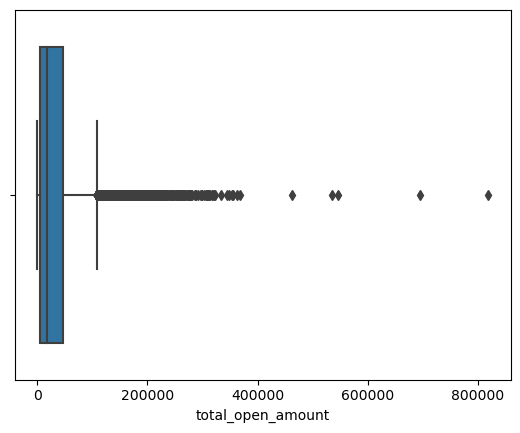

In [50]:
sns.boxplot(x=df["total_open_amount"])

We can see that there are some outliers in the total_open_amount

<AxesSubplot:xlabel='delay'>

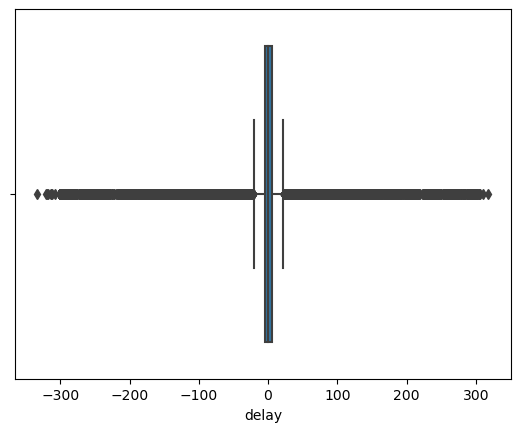

In [51]:
sns.boxplot(x=df['delay'])

We can see that there are outliers in delay as well. I will explain the reason why I am checking for outliers in delay with an example. Let us take a company that usually pays the amount 15-20 days from the due date, now that company for some reason paid the amount of a certain transaction after 300 days from the due date, keep in mind that this is the only transaction from that company with such delay and the transactions before and after this particular one never had the delay close to this so we can safely say that this is an outlier. This is the reason why I want to handle the outliers on the delay variable as well.

Text(0.5, 0, 'delay')

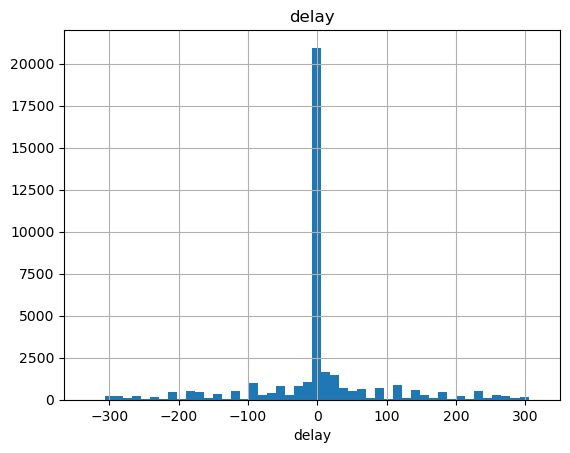

In [52]:
figure = df['delay'].hist(bins=50)
figure.set_title('delay')
figure.set_xlabel('delay')

In [53]:
# The delay column follows gaussian distribution so we can use emperical rule on it to handle outliers
# According to emperical rule 99.7% of data lies between the 3 standard deviations from the mean.
# So we can assume data outside these boundaries as outliers.
uppper_boundary=df['delay'].mean() + 3* df['delay'].std()
lower_boundary=df['delay'].mean() - 3* df['delay'].std()
print(lower_boundary), print(uppper_boundary),print(df['delay'].mean())

-273.08031475271935
275.3237196606948
1.12170245398773


(None, None, None)

We shall now see how many values are outside these lower and upper boundaries.

In [54]:
df['delay'][df['delay'] > 275 ].count() 

272

In [55]:
df['delay'][df['delay'] < -273 ].count() 

437

We shall drop these outliers from the dataset.

In [56]:
df['delay'].drop(df['delay'][df['delay'] < -273].index, inplace = True)
df['delay'].drop(df['delay'][df['delay'] > 275].index, inplace = True)

Text(0.5, 0, 'total_open_amount')

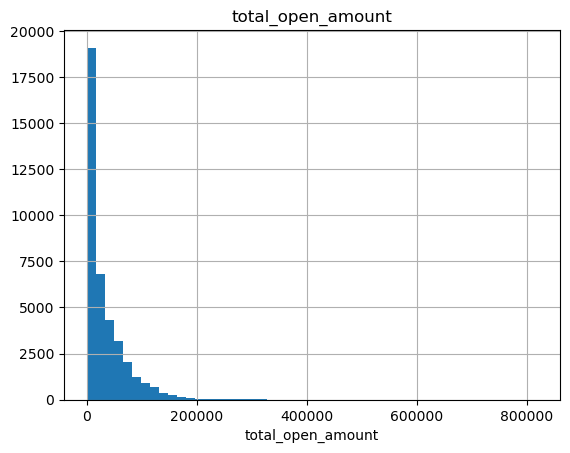

In [57]:
figure = df.total_open_amount.hist(bins=50)
figure.set_title('total_open_amount')
figure.set_xlabel('total_open_amount')

In [58]:
# total_open_amount is right skewed so we shall compute the lower and upper boundaries for it
# The below code calculates the inter quartile range of the total_open_amount
IQR=df.total_open_amount.quantile(0.75)-df.total_open_amount.quantile(0.25)

In [59]:
lower_bridge=df['total_open_amount'].quantile(0.25)-(IQR*3)
upper_bridge=df['total_open_amount'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-118945.52249999999
169225.4375


(None, None)

Amount cannot be negative so it is obvious that the total_open_amount values greater than 169225.4375 will be the outliers. We shall now calculate how many outliers do we have.

In [60]:
df['total_open_amount'][df['total_open_amount']>169225].count()

311

There are a total 311 values that are greater than 169225. We shall drop these values.

In [61]:
df.drop(df[df['total_open_amount'] > 169225].index, inplace = True)

### Test, validate and training data split

In [62]:
# I am not including business_code, cust_number, cust_payment_terms because I am using the encoded form of these features
X = df[['buisness_year','posting_date','document_create_date','total_open_amount','baseline_create_date','cust_payment_terms_cat','cust_name_cat','business_code_cat']]
# Delay will be our target variable so we shall put it in y
y = df['delay']

We will first divide the data set into training and testing with 15% being the testing and the rest being the training. After this we will be using splitting the training data further into train and vaildation data with 15% of the 85% earlier divided training set. So taking our overall dataframe into consideration it would be 72.24% of the data as testing data, 12.75% as validation data and 15% as testing data.

In [63]:
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.15, random_state = 465)

print('Training Data Count: {}'.format(X_train1.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 32987
Testing Data Count: 5822


In [64]:
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size = 0.15, random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_val.shape[0]))

Training Data Count: 28038
Testing Data Count: 4949


In [65]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

**Let us now perform EDA on our training data**

/Users/rohithkota/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='buisness_year', ylabel='count'>

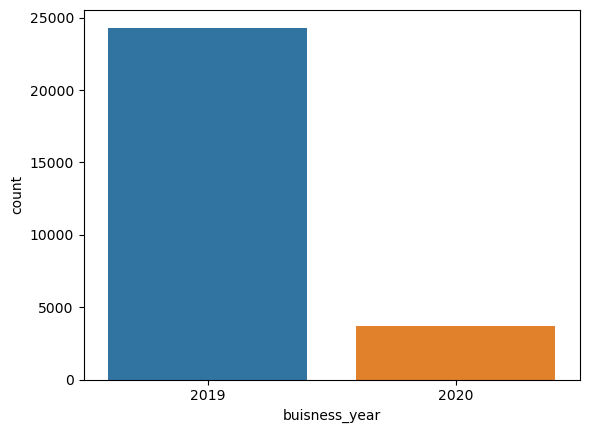

In [66]:
sns.countplot(X_train['buisness_year'])

The above diagram shows the total number of business transactions done in the years given in the dataset. We can observe that 2019 has more transactions compared to 2020.

<AxesSubplot:>

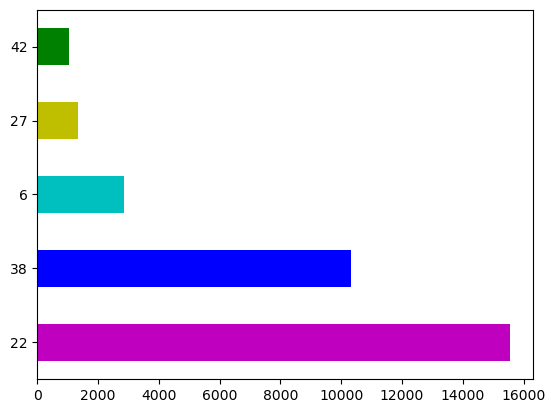

In [67]:
dff3 = df.cust_payment_terms_cat.value_counts().sort_values(ascending=False)
payment_terms = dff3.head()
payment_terms.sort_values(ascending=False).plot(kind='barh',color=['m', 'b', 'c', 'y', 'g'])

The above plot shows the top 5 most used payment terms arranged in the ascending order the most used one is NAA8 which is encoded as 22.0

<AxesSubplot:xlabel='business_code_cat'>

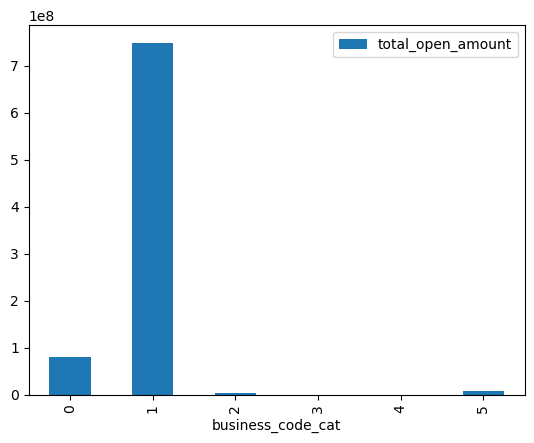

In [68]:
dff = X_train.groupby(["business_code_cat"]).total_open_amount.sum().reset_index()
dff[["business_code_cat","total_open_amount"]].plot(x='business_code_cat',kind = "bar")

This graph shows that the business code U001 which is encoded as 1.0 comprises the most amount of money as transactions among all the other business codes.

<AxesSubplot:xlabel='cust_name_cat'>

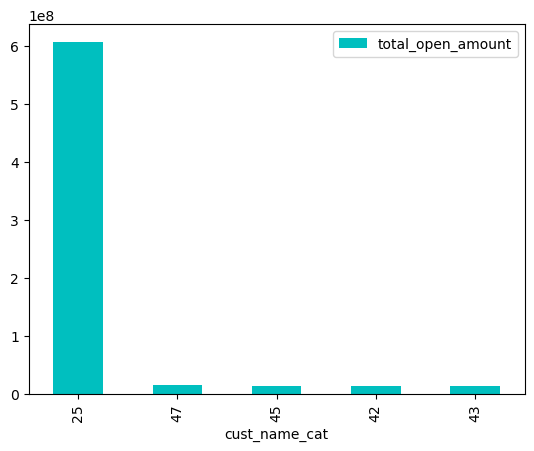

In [69]:
del dff
dff = X_train.groupby(["cust_name_cat"]).total_open_amount.sum().reset_index()
dff.sort_values(by=['total_open_amount'], inplace=True, ascending=False)
dff1 = dff.head()
dff1[["cust_name_cat","total_open_amount"]].plot(x='cust_name_cat',kind = "bar",color='c')

The above bar plot shows the top 5 customers with the most transaction amount done. The highest one is the WAL-MAR llc which is encoded as 47. Although 25 is being shown as the highest but that is the encoding of 'Others' category which is a combination of different companies. 

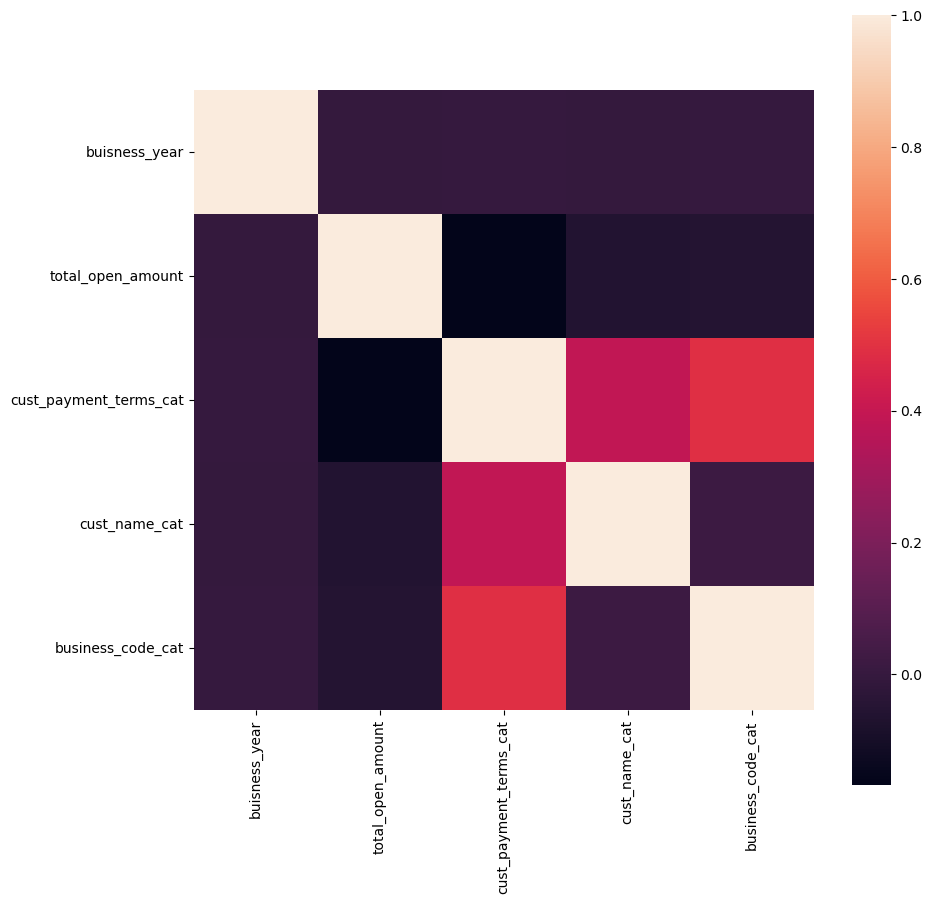

In [70]:
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

We can see that there is not much correlation between different features in the X_train.

In [71]:
X_train

,buisness_year,posting_date,document_create_date,total_open_amount,baseline_create_date,cust_payment_terms_cat,cust_name_cat,business_code_cat
0,2020,2020-01-26,2020-01-25,52108.1700,2020-01-26,38,46,1
1,2019,2019-05-26,2019-05-26,97583.5755,2019-05-26,6,25,0
2,2019,2019-07-18,2019-07-16,102251.4800,2019-07-18,22,25,1
3,2019,2019-08-02,2019-02-08,42041.6000,2019-02-08,38,46,1
4,2019,2019-12-02,2019-02-12,33908.0100,2019-02-12,38,31,1
...,...,...,...,...,...,...,...,...
28033,2019,2019-08-25,2019-08-24,46845.0600,2019-08-25,38,42,1
28034,2019,2019-11-09,2019-09-11,310.7800,2019-09-11,22,25,1
28035,2019,2019-12-14,2019-12-14,1504.8700,2019-12-14,38,44,1
28036,2019,2019-03-07,2019-07-03,5293.5200,2019-07-03,22,25,1


In [72]:
X_train['document_create_date_month'] = X_train['document_create_date'].dt.month
X_train['baseline_create_date_month'] = X_train['baseline_create_date'].dt.month
X_train['document_create_date_quarter'] = X_train['document_create_date'].dt.quarter
X_train['baseline_create_date_quarter'] = X_train['baseline_create_date'].dt.quarter

# Dropping these columns
X_train.drop(['document_create_date','baseline_create_date'],axis=1, inplace=True)

In [73]:
# For validation

X_val['document_create_date_month'] = X_val['document_create_date'].dt.month
X_val['baseline_create_date_month'] = X_val['baseline_create_date'].dt.month
X_val['document_create_date_quarter'] = X_val['document_create_date'].dt.quarter
X_val['baseline_create_date_quarter'] = X_val['baseline_create_date'].dt.quarter

# Dropping these columns
X_val.drop(['document_create_date','baseline_create_date'],axis=1, inplace=True)

In [74]:
# For testing

X_test['document_create_date_month'] = X_test['document_create_date'].dt.month
X_test['baseline_create_date_month'] = X_test['baseline_create_date'].dt.month
X_test['document_create_date_quarter'] = X_test['document_create_date'].dt.quarter
X_test['baseline_create_date_quarter'] = X_test['baseline_create_date'].dt.quarter

# Dropping these columns
X_test.drop(['document_create_date','baseline_create_date'],axis=1, inplace=True)

In [75]:
df['posting_date'].isin(df['baseline_create_date']).value_counts()

True     37097
False     1712
Name: posting_date, dtype: int64

This shows that posting date and baseline create date has almost similar values so we shall drop either of them. I am dropping the posting_date column.

In [76]:
X_train.drop(['posting_date'],axis=1, inplace=True)
X_val.drop(['posting_date'],axis=1, inplace=True)
X_test.drop(['posting_date'],axis=1, inplace=True)

### Feature transformation
In the outlier treatment part we have seen that **total_open_amount** follows a right skewed distribution so we shall transform it to a normal distribution as much as we can. We will be using three different transformations and see what gives us the best results and go with that.

Text(0.5, 0, 'total_open_amount')

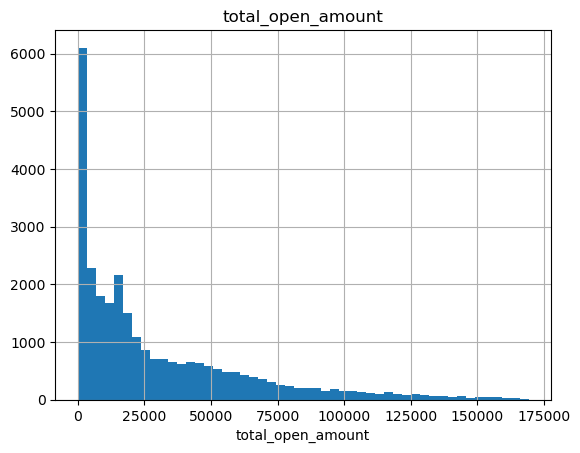

In [77]:
figure = X_train.total_open_amount.hist(bins=50)
figure.set_title('total_open_amount')
figure.set_xlabel('total_open_amount')

In [78]:
from scipy import stats
X_train['total_open_amount'].skew()

1.5462484555564964

In [79]:
# Boxcox transformation
total_open_amount_boxcox = stats.boxcox(X_train['total_open_amount'])[0]
pd.Series(total_open_amount_boxcox).skew()

-0.13151469064687768

In [80]:
# Log based transformation
total_open_amount_log = np.log(X_train['total_open_amount'])
total_open_amount_log.skew()

-0.994572205668582

In [81]:
# Square root transformation
total_open_amount_sqrt = np.sqrt(X_train['total_open_amount'])
total_open_amount_sqrt.skew()

0.5294694370304501

Out of all the transformations we can see that the boxcox transformation has shown the best result so we shall go with that. We shall also plot the transformation to check if we achieved what we wanted

In [82]:
X_train['total_open_amount_boxcox'] = stats.boxcox(X_train['total_open_amount'])[0]
X_val['total_open_amount_boxcox'] = stats.boxcox(X_val['total_open_amount'])[0]
X_test['total_open_amount_boxcox'] = stats.boxcox(X_test['total_open_amount'])[0]
X_train.drop(['total_open_amount'],axis=1,inplace = True)
X_val.drop(['total_open_amount'],axis=1,inplace = True)
X_test.drop(['total_open_amount'],axis=1,inplace = True)

Text(0.5, 0, 'total_open_amount')

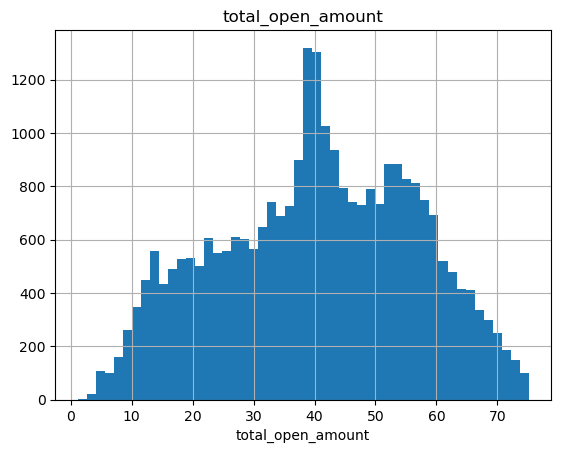

In [83]:
figure = X_train.total_open_amount_boxcox.hist(bins=50)
figure.set_title('total_open_amount')
figure.set_xlabel('total_open_amount')

We have not got a perfect normal distribution but it is better than the previous ones.

**Further feature selection using tree based method**

In [84]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

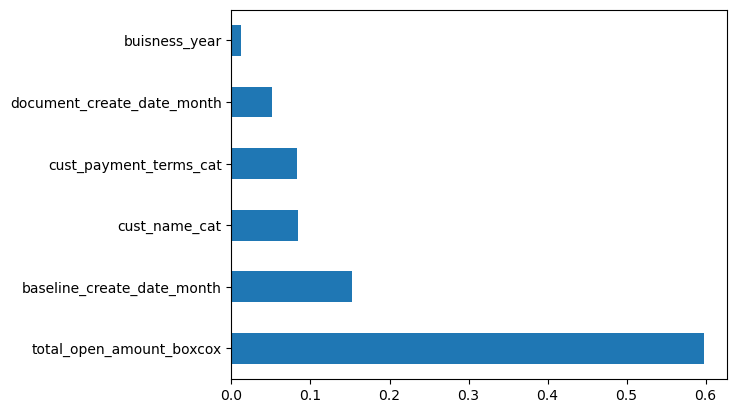

In [85]:
feature_importance=tree_based_feature_importance(X_train,y_train)

In [86]:
display(feature_importance)

,Features,Importances
8,total_open_amount_boxcox,0.597809
5,baseline_create_date_month,0.152078
2,cust_name_cat,0.083911
1,cust_payment_terms_cat,0.083360
4,document_create_date_month,0.051044
0,buisness_year,0.012065
6,document_create_date_quarter,0.008135
3,business_code_cat,0.007029
7,baseline_create_date_quarter,0.004569


We can see that not every feature is important for our model building so we shall use the top 6 features **'total_open_amount_boxcox','baseline_create_date_month','cust_payment_terms_cat','cust_name_cat','document_create_date_month','buisness_year'** as shown in the barchart.

In [87]:
X_train_new = X_train[['total_open_amount_boxcox','baseline_create_date_month','cust_payment_terms_cat','cust_name_cat','document_create_date_month','buisness_year']]
X_val_new = X_val[['total_open_amount_boxcox','baseline_create_date_month','cust_payment_terms_cat','cust_name_cat','document_create_date_month','buisness_year']]
X_test_new = X_test[['total_open_amount_boxcox','baseline_create_date_month','cust_payment_terms_cat','cust_name_cat','document_create_date_month','buisness_year']]

# Model Building

### Model 1: Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=9)

In [89]:
regressor.fit(X_train_new, y_train)

DecisionTreeRegressor(max_depth=9, random_state=0)

In [90]:
y_predict1 = regressor.predict(X_val_new)

In [91]:
from sklearn import metrics
# Calculating root mean square error 
metrics.mean_squared_error(y_val, y_predict1, squared=False)

81.71754879558856

In [92]:
# Calculating R-squared value 
metrics.r2_score(y_val, y_predict1)

0.23080016905641754

### Model 2: Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_new, y_train)

In [94]:
y_predict2 = reg.predict(X_val_new)

In [95]:
# Calculating root mean square error 
metrics.mean_squared_error(y_val, y_predict2, squared=False)

85.3815343776549

In [96]:
# Calculating R-squared value 
metrics.r2_score(y_val, y_predict2)

0.16027626577980392

### Model 3: Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train_new, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [98]:
y_predict3 = regr.predict(X_val_new)

In [99]:
# Calculating root mean square error 
metrics.mean_squared_error(y_val, y_predict3, squared=False)

80.75350039790825

In [100]:
# Calculating R-squared value 
metrics.r2_score(y_val, y_predict3)

0.2488421134607376

We can see that out of the three models we have built **Random Forest** gives us the better results. We have built the model on the X_train_new but we shall now build it on the initial training set i.e X_train so that we can know how much of a performance difference we will have upon excluding certain features.

In [101]:
regr1 = RandomForestRegressor(max_depth=10, random_state=0)
regr1.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [102]:
y_pred = regr1.predict(X_val)

In [103]:
# Calculating root mean square error 
metrics.mean_squared_error(y_val, y_pred, squared=False)

80.72228197640344

In [104]:
# Calculating R-squared value 
metrics.r2_score(y_val, y_pred)

0.24942278007340968

We can see that there is not much performance difference so we shall proceed with the random forest model which has important features only.

# Performing predictions on the final dataframe

In [105]:
# Resetting the index values of the dataframe
df1 = df1.reset_index()

Before performing predictions we first need to make sure the input dataframe has the same columns as the dataframe given during the fitting of the model so to perform that we shall create a copy of this dataframe and select features from that and perform predictions. 

In [106]:
df2 = df1.copy()

In [107]:
# We will be just processing the data to fit the model.
df2['document_create_date_month'] = df2['document_create_date'].dt.month
df2['baseline_create_date_month'] = df2['baseline_create_date'].dt.month

In [108]:
df2 = df2[['total_open_amount','baseline_create_date_month','cust_payment_terms_cat','cust_name_cat','document_create_date_month','buisness_year']]

In [109]:
#Predicting delay values
y_pred1 = regr.predict(df2)

/Users/rohithkota/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- total_open_amount
Feature names seen at fit time, yet now missing:
- total_open_amount_boxcox

  warnings.warn(message, FutureWarning)


In [110]:
# Inserting delay values in the dataframe
df1['delay'] = y_pred1

In [111]:
df1.dtypes

index                              int64
business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
cust_payment_terms_cat             int64
cust_name_cat                      int64
business_code_cat                  int64
delay                            float64
dtype: object

In [112]:
# We need to first convert delay into int because it is in float and converting them into int rounds off the values.
df1['delay'] = df1['delay'].astype(int)

We have now converted the delay to integer type. To add this value to the **due_in_date** and calculate **predicted_payment_date** we need to convert it to **days format** and add it. So we shall go ahead and do that.

In [113]:
# Converting it to datetime format
df1['delay']=pd.to_timedelta(df1['delay'], unit='D')

In [114]:
# Calculating predicted_payment_date
df1['predicted_payment_date'] = df1['due_in_date'] + df1['delay']

In [115]:
#Function to create buckets / range where the delay lies

def bucket (i):
    if i < 0: 
        return "< 0"
    elif (i >= 0 and i <= 15): 
        return "0 - 15"
    elif (i >= 16 and i <= 30): 
        return "16 - 30"
    elif (i >= 31 and i <= 45): 
        return "31 - 45"
    elif (i >= 46 and i <= 60): 
        return "46 - 60"
    else: 
        return "> 60"

In [116]:
# Before we create buckets for delay we need to convert the delay column from timedelta format to integer
df1['delay']=(df1['delay'] / np.timedelta64(1, 'D')).astype(int)

In [117]:
#We shall now apply the bucket function on the delay
df1['delay_range'] = df1['delay'].apply(bucket)

In [118]:
df1

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,cust_payment_terms_cat,cust_name_cat,business_code_cat,delay,predicted_payment_date,delay_range
0,34203,U001,200769623,WAL-MAR co,NaT,2020,1930584987,2020-01-03,2020-03-01,2020-03-16,15879.8200,2020-03-01,NAH4,1.930585e+09,1,38,42,1,47,2020-05-02,46 - 60
1,34204,U001,200743129,Others,NaT,2020,1930584967,2020-01-03,2020-03-01,2020-03-16,70510.4800,2020-03-01,NAA8,1.930585e+09,1,22,25,1,88,2020-06-12,> 60
2,34205,U001,200743123,Others,NaT,2020,1930584669,2020-01-03,2020-02-29,2020-03-16,76038.2400,2020-03-01,NAA8,1.930585e+09,1,22,25,1,47,2020-05-02,46 - 60
3,34206,U001,200794332,COST,NaT,2020,1930585560,2020-01-03,2020-03-01,2020-03-16,32629.0000,2020-03-01,NAAX,1.930586e+09,1,24,22,1,100,2020-06-24,> 60
4,34207,CA02,140104440,Others,NaT,2020,2960616986,2020-01-03,2020-03-02,2020-03-12,99649.6425,2020-03-02,CA10,2.960617e+09,1,6,25,0,62,2020-05-13,> 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,48823,U001,200769623,WAL-MAR corp,NaT,2020,1930885508,2020-12-05,2020-05-10,2020-05-27,41457.8200,2020-05-12,NAH4,1.930886e+09,1,38,43,1,20,2020-06-16,16 - 30
9704,48824,U001,200769623,WAL-MAR co,NaT,2020,1930885511,2020-12-05,2020-05-10,2020-05-27,8949.7000,2020-05-12,NAH4,1.930886e+09,1,38,42,1,20,2020-06-16,16 - 30
9705,48825,U001,200769623,WAL-MAR us,NaT,2020,1930890185,2020-12-05,2020-05-11,2020-05-27,8683.4100,2020-05-12,NAH4,1.930890e+09,1,38,50,1,20,2020-06-16,16 - 30
9706,48826,CA02,140104429,Others,NaT,2020,2960633840,2020-12-05,2020-05-12,2020-05-23,5673.4749,2020-05-13,CA10,2.960634e+09,1,6,25,0,20,2020-06-12,16 - 30


In [119]:
# We shall now drop the columns like different encoded categories, delay, etc and only keep the important columns that gives out important information.
df1.drop(['cust_payment_terms_cat', 'cust_name_cat', 'business_code_cat', 'index', 'isOpen', 'delay'],axis = 1, inplace = True)

In [120]:
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,predicted_payment_date,delay_range
0,U001,200769623,WAL-MAR co,NaT,2020,1930584987,2020-01-03,2020-03-01,2020-03-16,15879.8200,2020-03-01,NAH4,1.930585e+09,2020-05-02,46 - 60
1,U001,200743129,Others,NaT,2020,1930584967,2020-01-03,2020-03-01,2020-03-16,70510.4800,2020-03-01,NAA8,1.930585e+09,2020-06-12,> 60
2,U001,200743123,Others,NaT,2020,1930584669,2020-01-03,2020-02-29,2020-03-16,76038.2400,2020-03-01,NAA8,1.930585e+09,2020-05-02,46 - 60
3,U001,200794332,COST,NaT,2020,1930585560,2020-01-03,2020-03-01,2020-03-16,32629.0000,2020-03-01,NAAX,1.930586e+09,2020-06-24,> 60
4,CA02,140104440,Others,NaT,2020,2960616986,2020-01-03,2020-03-02,2020-03-12,99649.6425,2020-03-02,CA10,2.960617e+09,2020-05-13,> 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,U001,200769623,WAL-MAR corp,NaT,2020,1930885508,2020-12-05,2020-05-10,2020-05-27,41457.8200,2020-05-12,NAH4,1.930886e+09,2020-06-16,16 - 30
9704,U001,200769623,WAL-MAR co,NaT,2020,1930885511,2020-12-05,2020-05-10,2020-05-27,8949.7000,2020-05-12,NAH4,1.930886e+09,2020-06-16,16 - 30
9705,U001,200769623,WAL-MAR us,NaT,2020,1930890185,2020-12-05,2020-05-11,2020-05-27,8683.4100,2020-05-12,NAH4,1.930890e+09,2020-06-16,16 - 30
9706,CA02,140104429,Others,NaT,2020,2960633840,2020-12-05,2020-05-12,2020-05-23,5673.4749,2020-05-13,CA10,2.960634e+09,2020-06-12,16 - 30


We now have a dataframe which has important features like the customer number, document id, invoice id, etc that uniquely identifies every transaction along with its predicted payment date and the range of delay.